In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from userfunctions import *

In [2]:
#plt.style.use('default')
sns.set()

In [3]:
#загрузили исходные данные
df_raw = pd.read_excel(r'Prioksk_Air_in.xlsx')
#очистили их от того, что не потребуется и что может привести к ошибкам
df = PrepareDataFrame(df_raw.copy())
#создадим копию для удобства
data_total = df.copy()
winter_data, spring_data, summer_data, autumn_data = PrepareSeasonalDataFrame(df.copy())

Некорректные строки удалены:

        YY  MM  DD  TSP  SO2  SO4   HG   PB   CD  NO2
5187  1998   9  31  NaN  0.0  NaN  NaN  NaN  NaN  NaN


# NO2

In [4]:
ELEM_NAME = 'NO2'
ELEM = CreateDataBySeasons(ELEM_NAME
                           , data_total, winter_data, spring_data, summer_data, autumn_data
                           , with_zero=True)
VALUES = ExtractValues(ELEM)

if CountZerosInData(VALUES['all'], ELEM_NAME) > 0:
    #НЕ словарь, просто массив по полной выборке соответ-го элемента
    ELEM_NOT_NULL = CreateDataBySeasons(ELEM_NAME
                                        , data_total, winter_data, spring_data, summer_data, autumn_data
                                        , with_zero=False)
    VALUES_NOT_NULL = ExtractValues(ELEM_NOT_NULL)
else:
    VALUES_NOT_NULL = VALUES

Число нулевых элементов в полной выборке NO2: 8



Гистограмма для полной выборки NO2


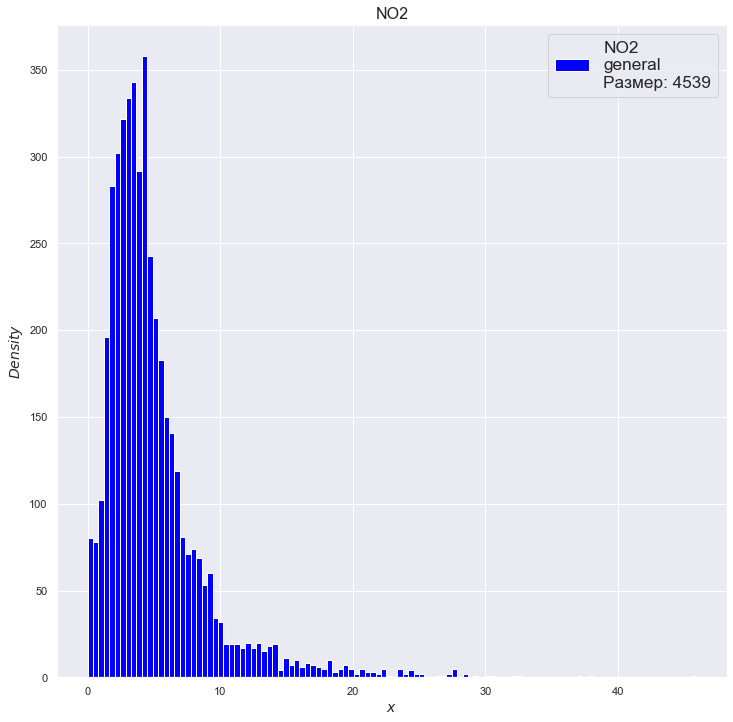

In [6]:
HistOnSample(VALUES['all'],'NO2')

In [15]:
start = datetime.datetime.now()
distr_ks, params_ks, p_v_ks, distr_chi2, params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL['all'])
print ('\nTook time: {0}'.format(datetime.datetime.now()-start))


Chi2
Best fitting distribution: mielke
Best p value: 0.2721219394579182
Parameters for the best fit: (2.8288359892822195, 2.8911133200184835, -0.4415818407294433, 4.460711167153704)

K-S
Best fitting distribution: mielke
Best p value: 0.486311608286271
Parameters for the best fit: (2.6755429093505687, 2.9469341226990853, -0.41395835711642126, 4.572405925332815)

Took time: 0:01:44.897092


In [17]:
distr_params_all = defaultdict(dict)
if p_v_ks >= 0.05:
    distr_params_all['general'][distr_ks] = params_ks
if p_v_chi2 >= 0.05:
    distr_params_all['general'][distr_chi2] = params_chi2

Text(0.5, 1.0, 'NO2')

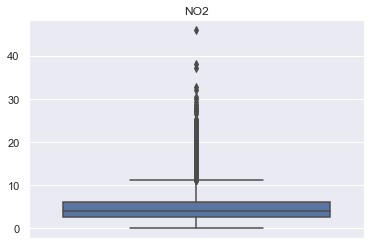

In [7]:
#sns.set(rc={'figure.figsize':(10,10)})
sns.boxplot(VALUES['all'],orient='v').set_title(ELEM_NAME)

In [19]:
SizeSample(VALUES['all'], ELEM_NAME)
k = CountZerosInData(VALUES['all'], ELEM_NAME)
CountByTreshold(VALUES['all'], ELEM_NAME, 5 , 0.5)

Размер полной выборки для NO2 равен 4539
Число нулевых элементов в полной выборке NO2: 8

Посмотрим на число элементов выше и ниже некоторых порогов для выборки NO2

Порог: 0.0, значений выше: 4531, ниже: 8
Порог: 0.5, значений выше: 4441, ниже: 98
Порог: 1.0, значений выше: 4331, ниже: 208
Порог: 1.5, значений выше: 4147, ниже: 392
Порог: 2.0, значений выше: 3800, ниже: 739
Порог: 2.5, значений выше: 3406, ниже: 1133
Порог: 3.0, значений выше: 3003, ниже: 1536
Порог: 3.5, значений выше: 2570, ниже: 1969
Порог: 4.0, значений выше: 2207, ниже: 2332
Порог: 4.5, значений выше: 1849, ниже: 2690
Порог: 5.0, значений выше: 1541, ниже: 2998


Построение графика всей выборки для NO2


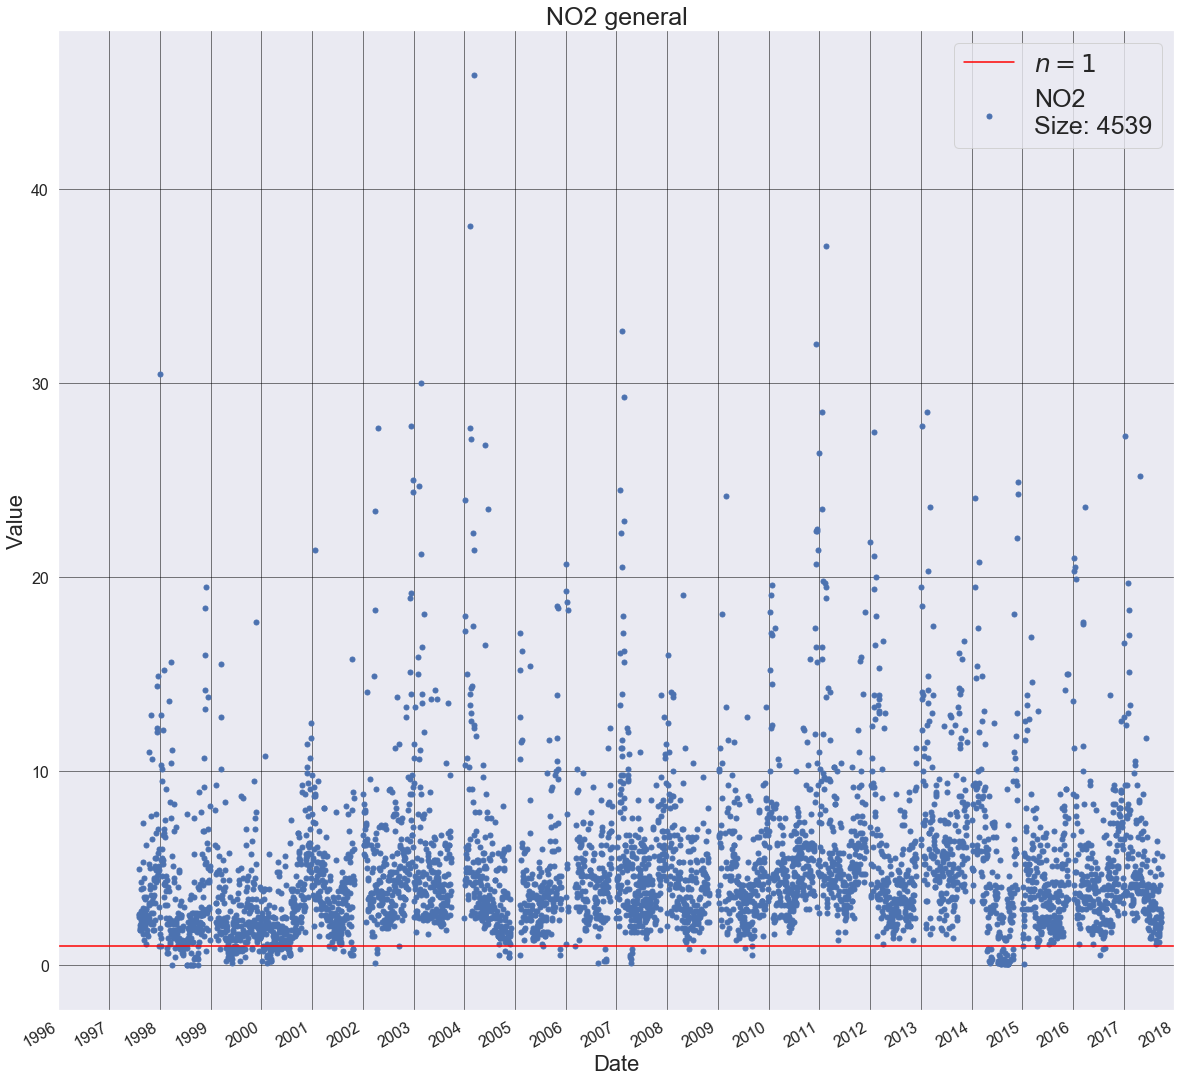

In [72]:
PlotElement(ELEM['all'],ELEM_NAME,'general',20,20,1)

Гистограмма 0-1 теста Колмогорова-Смирнова для выборки NO2


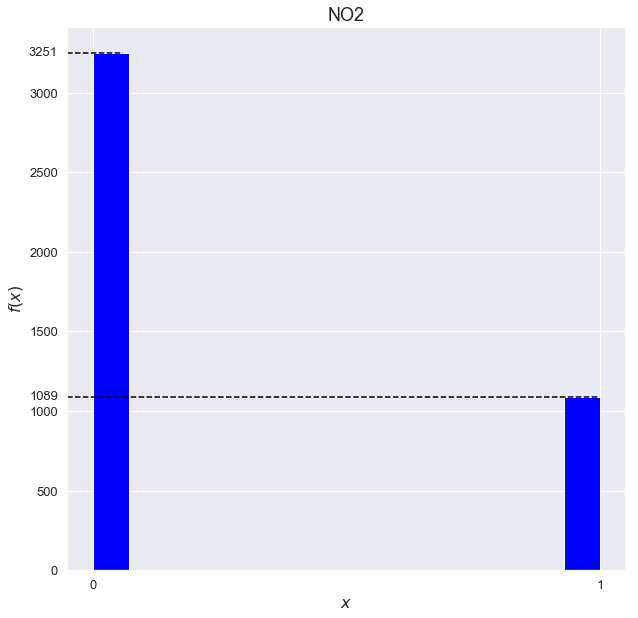

In [73]:
HistOnKSTest2Sample(KSTest2Sample(VALUES['all']), ELEM_NAME)

Принимаем гипотезу однородности К-С, если p-value > 0.05, сопоставляем ей 1, иначе 0
Число подряд идущих 1 - синим цветом, 0 - серым 


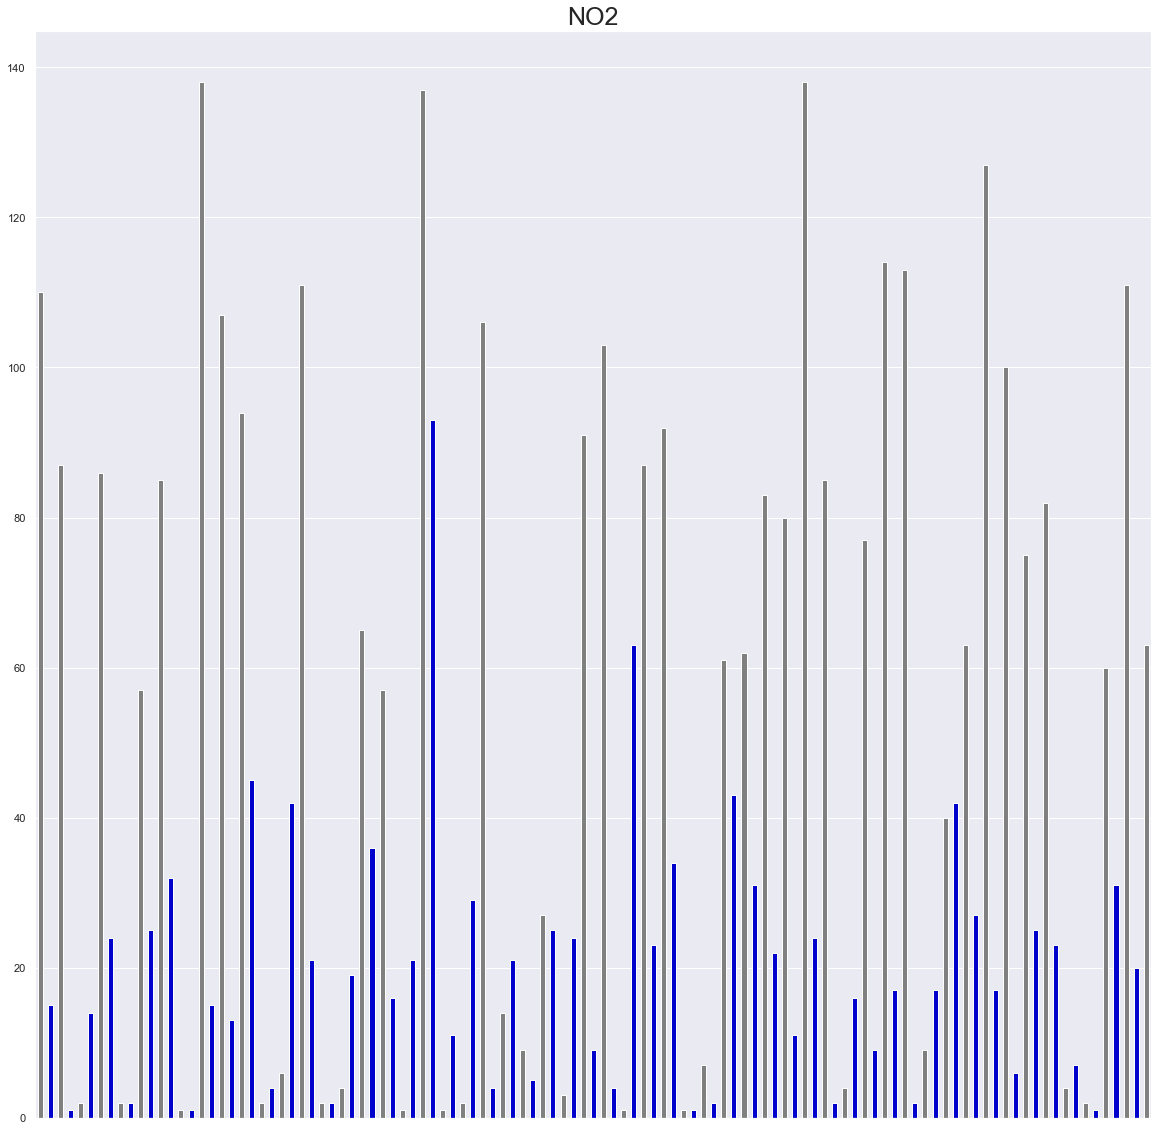

In [74]:
HistOnRepValues(RepeatedValuesCount(KSTest2Sample(VALUES['all'])),ELEM_NAME)

Поделим выборку на train и test (90 к 10), по 1-й оценим параметры, по 2-й проверим гипотезу о согласии К-С и Хи-квадрат для Гамма распределения

In [21]:
#GAMMA

test_size = 0.1

while True: 
    train, test = train_test_split(VALUES_NOT_NULL['all'], test_size=test_size)
    params = FitParams(train,'gamma', floc=0)
    s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params)
    s_ks, p_ks = KSOnTest(test, 'gamma', params)
    if p_chi2 >= 0.05 and p_ks >= 0.1:
        break
#based on chi2 and ks
#NO2
print('shape,loc,scale = {0}, p_v on Chi2 = {1}, p_v on KS = {2}'.format(params, p_chi2, p_ks))

shape,loc,scale = (2.0441518021165543, 0, 2.4206351457072963), p_v on Chi2 = 0.0634701681881032, p_v on KS = 0.11423456525520044


In [22]:
distr_params_all['general']['gamma'] = params

Гистограмма для выборки NO2, сезон - general
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


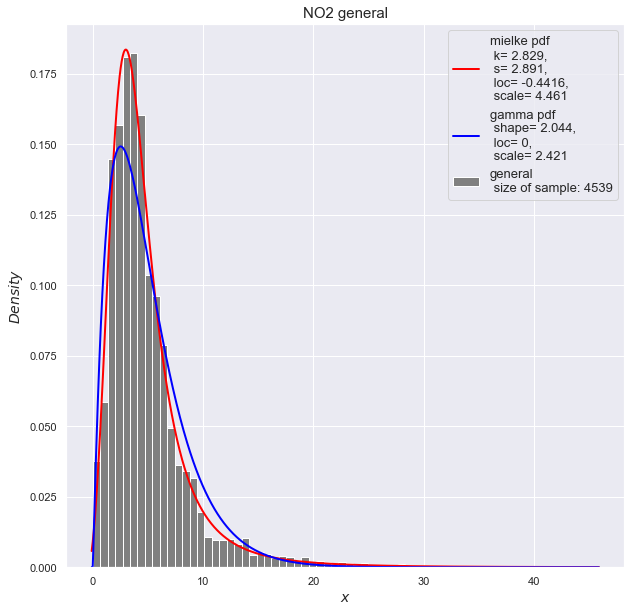

In [23]:
DistributionBySeason(VALUES['all'], ELEM_NAME, 'general', distr_params_all['general'])

In [84]:
distr_params_all

defaultdict(dict,
            {'general': {'mielke': (2.782382705624383,
               2.8914829804786506,
               -0.4443108707583309,
               4.4818766075067185),
              'gamma': (2.115970544498219, 0, 2.314193842228663)}})

In [85]:
#GAMMA
print('GAMMA\n')

stat, p_v = KSOnTest(test, 'gamma', params)
print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
stat, p_v = ChiSquareOnTest(test, 'gamma', params)
print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))

GAMMA

KS TEST:
Power_divergenceResult(statistic=0.03982614077405655, pvalue=0.10959678854121427)
CHISQARE TEST:
Power_divergenceResult(statistic=904.7130369100727, pvalue=3.285329823796216e-173)


## Рассмотрим сезонные выборки

In [86]:
params_seasons = {}

In [101]:
#GAMMA
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons = {}
train_test_seasons = {}
for s in seasons:
    while True: 
        train, test = train_test_split(VALUES_NOT_NULL[s], test_size=0.2)
        params_seasons[s] = FitParams(train, 'gamma', floc=0)
        s_chi2, p_chi2 = ChiSquareOnTest(test, 'gamma', params_seasons[s])
        s_ks, p_ks = KSOnTest(test, 'gamma', params_seasons[s])
        if p_chi2 >= 0.1 and p_ks >=0.5:
            train_test_seasons[s] = [train, test]
            break
for s in seasons:
    print(s, ': ', params_seasons[s])
print('p_v on Chi2 = {0}, p_v on KS = {1}'.format(p_chi2, p_ks))

winter :  (1.9994829132840057, 0, 3.7717731895048883)
spring :  (2.262886700041614, 0, 2.0316481413534255)
summer :  (2.731397698340015, 0, 1.3045533319514429)
autumn :  (2.4371624716010767, 0, 2.00223407085223)
p_v on Chi2 = 0.1353007511574794, p_v on KS = 0.7552017251037363


In [24]:
start = datetime.datetime.now()
seasons = ['winter', 'spring', 'summer', 'autumn']
params_seasons_ks,params_seasons_chi2 = defaultdict(dict), defaultdict(dict)
train_test_seasons1 = {}
for s in seasons:
    print()
    print(s.upper())
    print()
    distr_ks,params_ks,p_v_ks, distr_chi2,params_chi2, p_v_chi2 = GetBestDistribution(VALUES_NOT_NULL[s])
    if p_v_ks >= 0.05:
        params_seasons_ks[s][distr_ks] = params_ks
    if p_v_chi2 >= 0.05:
        params_seasons_chi2[s][distr_chi2] = params_chi2
print('\nTook time: {0}'.format(datetime.datetime.now()-start))


WINTER


Chi2
Best fitting distribution: lognorm
Best p value: 0.14232575903594843
Parameters for the best fit: (0.7592341892447053, 0.0, 5.8303812788117435)

K-S
Best fitting distribution: recipinvgauss
Best p value: 0.9544870855314821
Parameters for the best fit: (0.4482868588857753, -0.9693642246587795, 2.6016953945058514)

SPRING


Chi2
Best fitting distribution: lognorm
Best p value: 0.0282482587648301
!!!Optimal Distribution on Chi Square was not found!!!

K-S
Best fitting distribution: mielke
Best p value: 0.7652465423048509
Parameters for the best fit: (2.221636429733011, 3.220813367477522, -0.13734271163256068, 4.696425209784211)

SUMMER


Chi2
Best fitting distribution: gamma
Best p value: 0.04586477224860034
!!!Optimal Distribution on Chi Square was not found!!!

K-S
Best fitting distribution: gamma
Best p value: 0.7337890298767439
Parameters for the best fit: (3.540096749153757, -0.33255121539283794, 1.1006167244053764)

AUTUMN


Chi2
Best fitting distribution: mielke
Best

In [91]:
distr_params_seasons = defaultdict(dict)
for s in seasons:
    try:
        distr_ks, params_ks = list(params_seasons_ks[s].keys())[0], list(params_seasons_ks[s].values())[0] 
        distr_params_seasons[s][distr_ks] = params_ks
    except IndexError:
        continue
for s in seasons:
    try:
        distr_chi2, params_chi2 = list(params_seasons_chi2[s].keys())[0], list(params_seasons_chi2[s].values())[0] 
        distr_params_seasons[s][distr_chi2] = params_chi2
    except IndexError:
        continue
for s in seasons:
    params_gamma = params_seasons[s]
    distr_params_seasons[s]['gamma'] = params_gamma
    

Гистограмма для выборки NO2, сезон - winter
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


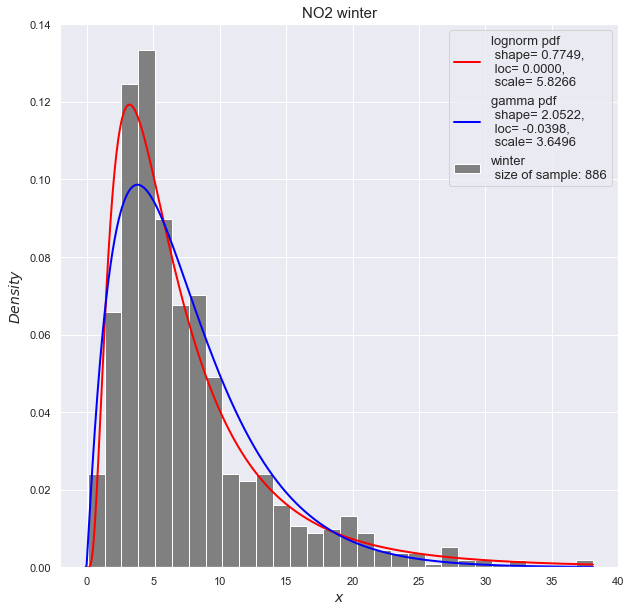

Гистограмма для выборки NO2, сезон - spring
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


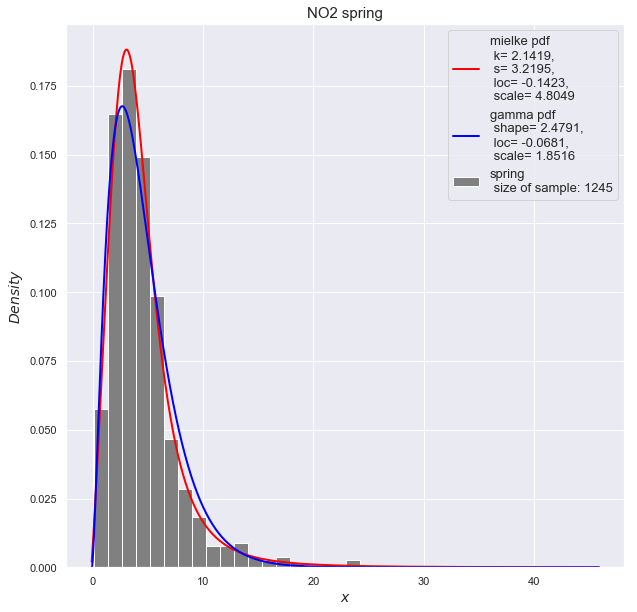

Гистограмма для выборки NO2, сезон - summer
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


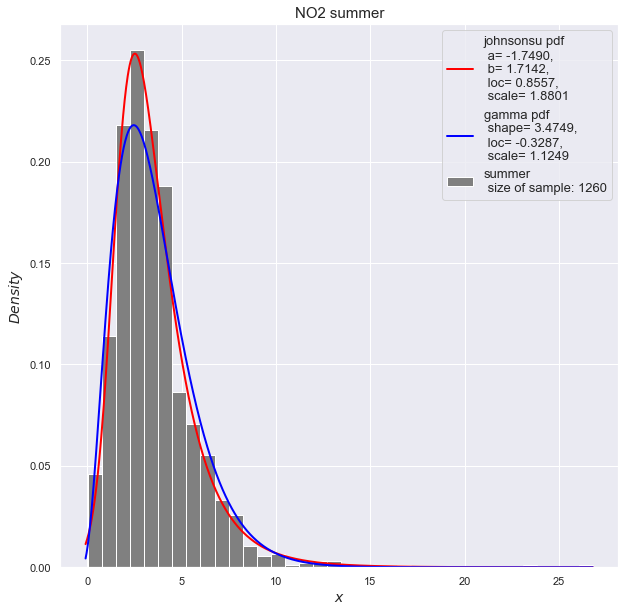

Гистограмма для выборки NO2, сезон - autumn
Поверх нее строятся теоритические функции плотности вероятности с вычисленными параметрами


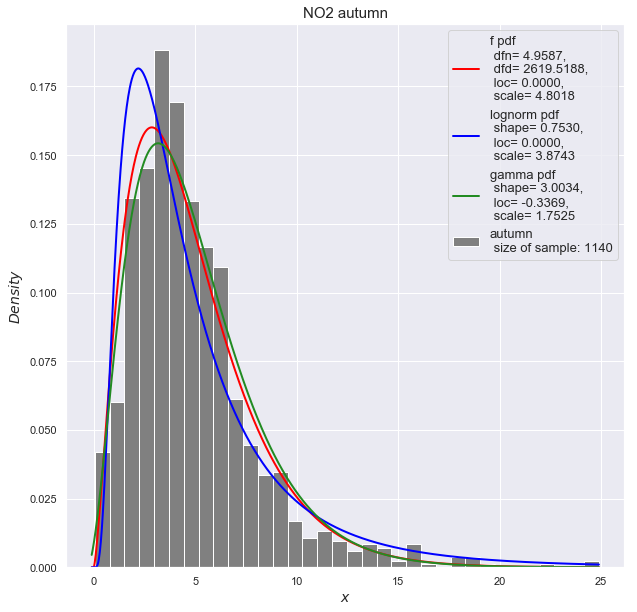

In [106]:
for s in seasons:
    DistributionBySeason(VALUES_NOT_NULL[s], ELEM_NAME, season=s,params_dict=distr_params_seasons[s])

### Проверка гипотезы о согласии Хи-квадрат и К-С для сезонных выборок для Гамма распределения
#### Для других подобранных распределений результаты выше

In [93]:
#GAMMA
for s in seasons:
    print(s.upper())
    print()
    stat, p_v = KSOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('KS TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    stat, p_v = ChiSquareOnTest(train_test_seasons[s][1], 'gamma', params_seasons[s])
    print('CHISQARE TEST:\nPower_divergenceResult(statistic={0}, pvalue={1})'.format(stat, p_v))
    print()

WINTER

KS TEST:
Power_divergenceResult(statistic=0.05173228945570579, pvalue=0.7456789805748281)
CHISQARE TEST:
Power_divergenceResult(statistic=16.724195294444694, pvalue=0.08069399204113525)

SPRING

KS TEST:
Power_divergenceResult(statistic=0.04369548610824787, pvalue=0.7286312912679097)
CHISQARE TEST:
Power_divergenceResult(statistic=794039.6611790519, pvalue=0.0)

SUMMER

KS TEST:
Power_divergenceResult(statistic=0.07571266450891934, pvalue=0.10564565319342535)
CHISQARE TEST:
Power_divergenceResult(statistic=16.579680250215173, pvalue=0.16610392007627922)

AUTUMN

KS TEST:
Power_divergenceResult(statistic=0.09391360175499497, pvalue=0.03352723122221798)
CHISQARE TEST:
Power_divergenceResult(statistic=15.211822941986433, pvalue=0.23005638312215468)



## Нарисуем 4 гамма распределения, полученные в результате работы ЕМ алгоритма
Выборка делилась на 4 части, учитывая след формулу "количество элементов за данное время года / вся выборка"

Использовался метод gammamixEM из R

In [100]:
dic = {'x':VALUES_NOT_NULL['all']}
df = pd.DataFrame(dic, columns=['x'])
df.to_csv('NO2all.csv', index=False)

In [96]:
print('PROPORTIONS OF SEASON DATA FROM ALL DATA')
print('WINTER:', len(VALUES['winter'])/len(VALUES['all']), sep=' ')
print('SPRING:', len(VALUES['spring'])/len(VALUES['all']), sep=' ')
print('SUMMER:', len(VALUES['summer'])/len(VALUES['all']), sep=' ')
print('AUTUMN:', len(VALUES['autumn'])/len(VALUES['all']), sep=' ')

PROPORTIONS OF SEASON DATA FROM ALL DATA
WINTER: 0.19519717999559374
SPRING: 0.27450980392156865
SUMMER: 0.278916060806345
AUTUMN: 0.2513769552764926


Веса: [0.3225447, 0.20966, 0.2682832, 0.1995121]


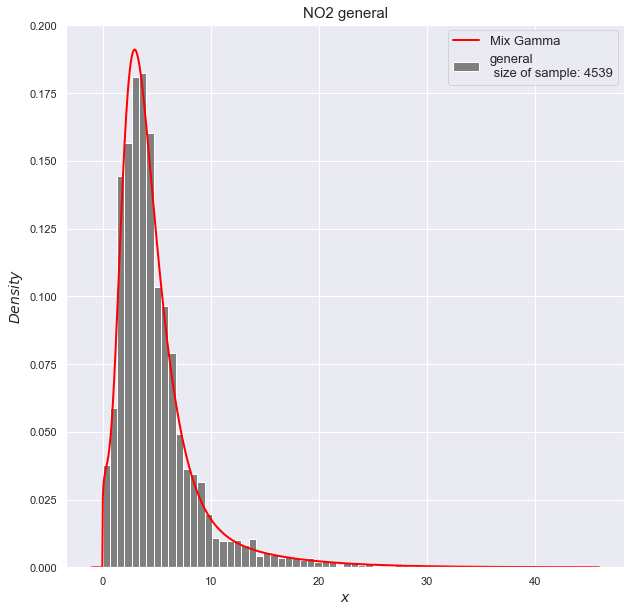

In [28]:
sh_loc_sc1, lamb1 = FormShLocScLamb('1.166207 4.807449 5.7502928 4.9526485', '5.663235 1.006271 0.5549564 0.9503039',
                                   '0.3225447 0.2096600 0.2682832 0.1995121')

x = np.linspace(-1, max(VALUES['all']),1000)

def CreateCombPDF(lamb, sh_loc_sc):
    f = lamb[0]*st.gamma.pdf(x, *sh_loc_sc[0])
    for i in range(1,len(lamb)):
        f += lamb[i]*st.gamma.pdf(x, *sh_loc_sc[i])
    return f

def ShapeScaleCombPDF(lamb,sh_loc_sc):
    sh,sc=0,0
    for i in range(len(lamb)):
        sh += sh_loc_sc[i][0]*lamb[i]
        sc += sh_loc_sc[i][2]*lamb[i]
    return sh, sc

def EMGammaMixPlot_4():
    fig = plt.figure(figsize=(10,10))
    
    y1 = CreateCombPDF(lamb1,sh_loc_sc1)
    sh_sc_y1 = ShapeScaleCombPDF(lamb1, sh_loc_sc1)
    plt.plot(x,y1,color='red',lw=2,label='Mix Gamma'. \
             format(sh_sc_y1[0],sh_sc_y1[1]))
    
    plt.hist(VALUES['all'], bins='sqrt', density=True, color='grey',
         label='{0}\n size of sample: {1}'.format('general',len(VALUES['all'])))
    plt.title(ELEM_NAME + ' general',fontsize=15)
    plt.legend(loc='best', fontsize=13)
    plt.ylabel('$Density$', fontsize=14)
    plt.xlabel('$x$', fontsize=14)
    plt.show()
    return fig

print('Веса: {0}'.format(lamb1))  
fig3 = EMGammaMixPlot_4()
fig3.savefig(ELEM_NAME+'_MixGamma.png', bbox_inches='tight', pad_inches=0)